# 神经元和感知机

In [1]:
import numpy

class Perceptron(object):
    def __init__(self, input_size, alpha, n_iter):
        # 产生长度为(input_size + 1)的随机向量作为初始权重
        # 将bias视作最后一个权重
        # 随机值取在[0,1]区间上，减去0.5使随机值的期望变成0
        # 即初始权重是0附近的小随机数
        self.weight = numpy.random.rand(input_size + 1) - 0.5
        # 学习率
        self.alpha = alpha
        # 迭代次数
        self.n_iter = n_iter

    # 感知机的计算过程
    def predict(self, X):
        # 在每一行数据之后增加一列常量1
        # 该常量与最后一个权重相乘作为bias
        # 这样我们就不需要单独处理bias
        # 参数((0,0),(0,1))中，
        # 第一组(0,0)表示在第一维（行）前后不补齐数据
        # 第二组(0,1)表示在第二维（列）之前不补齐数据，在之后补齐1列
        # 补齐方式是'constant'即常量，常量值为1
        X = numpy.pad(X, ((0,0),(0,1)), 'constant', constant_values=1)
        # 然后将X和权重做矩阵乘法
        Y = numpy.matmul(X, self.weight)
        # 输出经过激活函数后得到的值
        return self.sigmoid(Y)

    def sigmoid(self, X):
        return 1 / (1 + numpy.exp(-X))

    # 感知机的训练过程
    def fit(self, X, Y):
        # 仍然要处理输入，增加一列常量1
        X = numpy.pad(X, ((0,0),(0,1)), 'constant', constant_values=1)
        Y = numpy.array(Y)
        # 重复n_ter次训练过程
        for i in range(self.n_iter):
            # 计算当前输出
            y = self.sigmoid(numpy.matmul(X, self.weight))
            # 计算权值更新
            # 将输出偏差整形为列向量，以便与输入对应行相乘
            delta_y = numpy.reshape(Y - y, (-1,1))
            # 这是激活函数的导数部分
            deriv_y = numpy.reshape(y*(1-y), (-1,1))
            # 注意下面是每行对应相乘，而不是矩阵乘法
            # 这样我们实际上对每一行数据都得到了对应的权值更新量
            delta_w = delta_y * deriv_y* X * self.alpha
            # 由于我们批量计算出了所有样本产生的权值更新量
            # 因此，我们需要把权值更新量进行平均
            # 对所有样本进行平均，因此取平均值的维度是第一维
            delta_w = numpy.mean(delta_w, axis=0)
            # 然后更新权值
            self.weight = self.weight + delta_w
            # 输出平均误差，帮助我们观察训练的过程
            print('第{0}轮误差为: {1}'.format(
                i, numpy.mean(numpy.power(delta_y, 2))))


In [2]:
perceptron = Perceptron(2, 0.5, 100)
perceptron.fit([[1,2],[2,3],[4,3],[3,2]],[1,1,0,0])
print(perceptron.predict([[3,4],[2,1]]))
# 输出样例：[0.72107778 0.24065793]
# 表明感知机区分出了两个输入数字的大小差别
print(perceptron.weight)
# 输出样例：[-1.53422978  1.15957956  0.84045471]
# 这说明感知机输出0.5的位置是直线：-1.53 x_1 + 1.16 x_2  + 0.84 = 0


第0轮误差为: 0.3659098120161016
第1轮误差为: 0.32579818723348225
第2轮误差为: 0.28275665841971165
第3轮误差为: 0.2504991829997515
第4轮误差为: 0.23298230040863663
第5轮误差为: 0.22296664948161826
第6轮误差为: 0.21540357428722023
第7轮误差为: 0.2086401306664597
第8轮误差为: 0.20223305127711688
第9轮误差为: 0.19606838032601476
第10轮误差为: 0.19011690034384535
第11轮误差为: 0.1843701873355034
第12轮误差为: 0.17882425128237953
第13轮误差为: 0.1734755454939323
第14轮误差为: 0.16832011906458325
第15轮误差为: 0.16335352826277846
第16轮误差为: 0.1585709102490531
第17轮误差为: 0.15396707840265716
第18轮误差为: 0.14953660982026093
第19轮误差为: 0.14527392079736137
第20轮误差为: 0.14117333105947452
第21轮误差为: 0.137229118124906
第22轮误差为: 0.13343556304574677
第23轮误差为: 0.1297869885917195
第24轮误差为: 0.12627779080476323
第25轮误差为: 0.12290246475003015
第26轮误差为: 0.11965562520540496
第27轮误差为: 0.11653202295790019
第28轮误差为: 0.11352655730749008
第29轮误差为: 0.11063428531576752
第30轮误差为: 0.10785042827789769
第31轮误差为: 0.10517037584170776
第32轮误差为: 0.10258968814744025
第33轮误差为: 0.10010409631572285
第34轮误差为: 0.09770950156959626
第35轮

## 识别手写数字

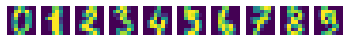

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 加载UCI手写数字数据集
digits = load_digits()
for i in range(10):
    # 显示1行10列中的第i+1个图
    plt.subplot(1,10,i+1)
    plt.imshow(digits.images[i])
    # 隐藏坐标轴刻度
    plt.axis('off')
plt.show() 

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_digits

# X是1797行、64列的矩阵
# 每一行是一个手写数字样本
# 图像中的像素被拉平展开为长度64的行向量
# y是长度为1797的数组，包含样本对应的数字值
X, y = load_digits(return_X_y=True)

# 创建感知机模型
# max_iter是最大迭代次数
# tol参数可以控制当误差不在减小时提前结束训练
# 当本轮误差减去前一轮的差值大于tol时，结束训练
# eta0是学习率
perceptron = Perceptron(max_iter=1000, tol=0.001, eta0=1)

# 与我们实现的感知机模型的训练方法略有不同
# 这里y值表示样本的类别
# 根据y中不同值的数量（也就是类别数量）分别建立若干感知机
perceptron.fit(X, y)

Perceptron(eta0=1)

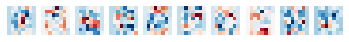

In [5]:
import numpy
import matplotlib.pyplot as plt

for i in range(10):
    # 显示1行10列中的第i+1个图
    plt.subplot(1,10,i+1)
    # 显示第i个类别对应的感知机权值
    # 将权值向量整形为矩阵以和输入图像像素位置对应
    plt.imshow(numpy.reshape(perceptron.coef_[i,:], (8,8)),
        cmap=plt.cm.RdBu)
    # 隐藏坐标轴刻度
    plt.axis('off')
plt.show()


In [6]:
import numpy

# 取数据集的前十个样本验证感知机的输出
# 感知机的权值，每行表示一个感知机的权值
w = perceptron.coef_
# 感知机的偏置，列向量，每行表示一个感知机的偏置
b = perceptron.intercept_
# 对数据集的前10个样本，计算每个感知机的输出
# 将数据转置，每列表示一个样本
x = numpy.transpose(X[0:10,:])
out = numpy.matmul(w, x) + b
# 由于输出太接近0或者1，我们进行了缩放，以显示差异
out = 1 / (1 + numpy.exp(-out/1000))
for i in range(10):
    print(list(map(lambda x: '{0:.2f}'.format(x), out[i,:])))


['0.98', '0.00', '0.00', '0.00', '0.02', '0.00', '0.00', '0.00', '0.00', '0.03']
['0.00', '1.00', '0.23', '0.04', '0.07', '0.71', '0.15', '0.00', '0.00', '0.05']
['0.01', '0.00', '0.96', '0.00', '0.00', '0.00', '0.00', '0.01', '0.01', '0.00']
['0.00', '0.00', '0.00', '1.00', '0.00', '0.06', '0.00', '0.00', '0.00', '0.00']
['0.00', '0.01', '0.00', '0.00', '0.99', '0.00', '0.01', '0.01', '0.00', '0.00']
['0.00', '0.00', '0.00', '0.01', '0.00', '0.02', '0.00', '0.00', '0.00', '0.02']
['0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.76', '0.00', '0.00', '0.00']
['0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.99', '0.00', '0.00']
['0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.04', '0.00', '0.97', '0.00']
['0.01', '0.00', '0.00', '0.00', '0.00', '0.12', '0.00', '0.00', '0.00', '0.80']
